# Importing tools

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# loading and splitting the description

In [4]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=42)

## Random Forest = Collection of Decision Tree

* combining multiple Decion Trees retain the predictive power and it can reduce the overfitting by averaging the results

#### Parameter 
* n_estimators

In [5]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train,y_train)

In [6]:
print('Accuracy on the training dataset: {:.3f}' .format(forest.score(X_train,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(forest.score(X_test,y_test)))

Accuracy on the training dataset: 1.000
Accuracy on the testing dataset: 0.958


* the single decision tree only had an accuracy of 93% so Random Forest is an improvement
* Also there is an overfitting in training so we need to pre-prune or change the parameters (max_features)

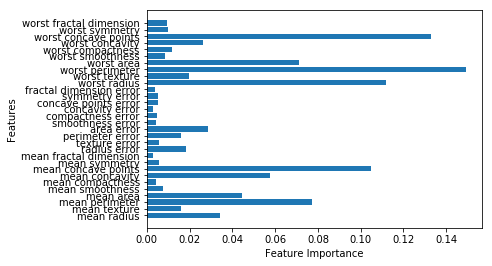

In [7]:
n_features=cancer.data.shape[1]
plt.barh(range(n_features),forest.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#### here compared to the decision tree many more features have importance/ non-zero contributions than only few
* it provides a more informed choice

#### Potential Advantages of Random Forests
* powerful and widely implemented
* perform well with default settings
* dont require scaling of the data
* randomization makes them better than single DT

#### Parameters to Tune
* n_jobs - number of cores to use for training (n_jobs=-1, for all cores)
* n_estimators - how many trees to use (more is always better)
* max_depth, for pre-pruning
* max_features, for randomization
* max_features = sqrt(n_features), for classification
* max_features = log2(n_features), for regression etc.

#### Potential Disadvantages of Random Forests
* not so good performance on very high dimensional and sparse data (text data)
* large datasets require more resources for training (time, CPUs, etc).
* cannot be visualized as well as single DT